#### Explortary Analysis using Stack Overflow Developer Survery from 2017

In [7]:
#import libraries and basic setting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu,chi2_contingency
%matplotlib inline
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
sns.set(style="ticks", palette="pastel")

In [3]:
#read raw data
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

In [253]:
#check values in cloumn Gender
df.Gender.value_counts(normalize=True)

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Male; Female; Transgender; Gender non-conforming; Other       15
Male; Female                                                  15
Transgender; Gender non-conforming                            15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Female; Transgender

In [258]:
#check missing values in Gender
df.Gender.isnull().sum()

16345

In [4]:
#Filter only Male or Female respondents for comparison.
#Only 8% of survey respondents are female.
df_gender = df[(df.Gender =='Male')|(df.Gender =='Female')]
df_gender.Gender.value_counts()

Male      31589
Female     2600
Name: Gender, dtype: int64

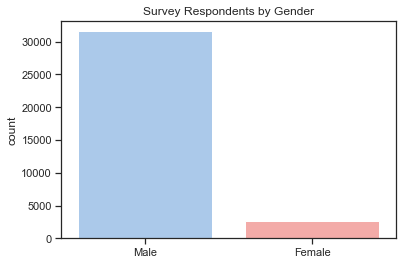

In [74]:
#Bar chart for Survey Respondents by Gender
sns.countplot(x="Gender", data=df_gender,palette=["b", "r"]).set_title('Survey Respondents by Gender');
plt.xlabel("")
plt.savefig("Gender Count.png")

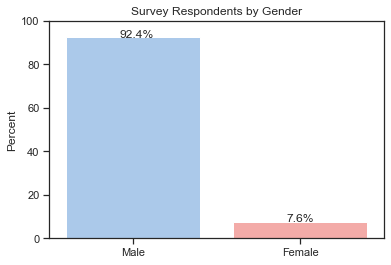

In [75]:
#Plotting percentage in bar chart
gender_plot =(df_gender.Gender.value_counts(normalize=True).mul(100).rename('Percent').rename_axis('Gender').reset_index()
.pipe((sns.barplot, "data"), x='Gender', y='Percent',palette=["b", "r"]))
gender_plot.set_title('Survey Respondents by Gender')
gender_plot.set_ylim(0,100)
plt.xlabel("")
for p in gender_plot.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + p.get_width() / 2.5
    txt_y = p.get_height()
    gender_plot.text(txt_x,txt_y,txt)
plt.savefig("Gender Percent.png")

1. Do salary of female programmers overtake earning of male programmerdevelopers?

In [82]:
#check values in cloumn EmploymentStatus
df_gender.groupby(df_gender.Gender).EmploymentStatus.value_counts(normalize=True)

Gender  EmploymentStatus                                    
Female  Employed full-time                                      0.768462
        Employed part-time                                      0.064231
        Independent contractor, freelancer, or self-employed    0.063077
        Not employed, but looking for work                      0.059231
        Not employed, and not looking for work                  0.031154
        I prefer not to say                                     0.010769
        Retired                                                 0.003077
Male    Employed full-time                                      0.726202
        Independent contractor, freelancer, or self-employed    0.111051
        Employed part-time                                      0.057520
        Not employed, but looking for work                      0.045807
        Not employed, and not looking for work                  0.045617
        I prefer not to say                                    

In [5]:
#filter only Employed respondents (full time/part time/contractor) for comparison.
df_employed = df_gender[(df_gender.EmploymentStatus =='Employed full-time')
          |(df_gender.EmploymentStatus =='Employed part-time')
          |(df_gender.EmploymentStatus =='Independent contractor, freelancer, or self-employed')]

In [79]:
#check size of records
df_employed.Gender.value_counts()

Male      28265
Female     2329
Name: Gender, dtype: int64

In [81]:
#Statistics Summary for Salary and Expected Salary
df_employed.groupby(df_employed.Gender)[['Salary','ExpectedSalary']].describe()

Salary                                                               \
          count          mean           std  min           25%           50%   
Gender                                                                         
Female    819.0  58083.924534  38607.488222  0.0  31250.000000  52500.000000   
Male    10666.0  56996.494293  39722.918323  0.0  27262.626263  50537.634409   

                          ExpectedSalary                              \
            75%       max          count          mean           std   
Gender                                                                 
Female  83000.0  195000.0           86.0  33627.165808  28622.758773   
Male    80000.0  197000.0          825.0  35881.554098  28275.783517   

                                                                     
             min          25%           50%           75%       max  
Gender                                                               
Female  0.044046  2518.755239  34879.032258  53872.127061  100000.0  
Male    0.000000  7341.065923  36000.000000  53763.440860  150000.0

In [83]:
#Exclude missing values (only focus on the respondents with Salary/Expected Salary)
salary = df_employed[['Gender','Salary','ExpectedSalary']]
salary_unpivot = salary.melt(id_vars=['Gender'], var_name='Type', value_name='Amount').dropna()
salary_unpivot.head()

,Gender,Type,Amount
1,Male,Salary,113750.0
9,Male,Salary,100000.0
11,Male,Salary,130000.0
14,Male,Salary,100764.0
16,Male,Salary,175000.0


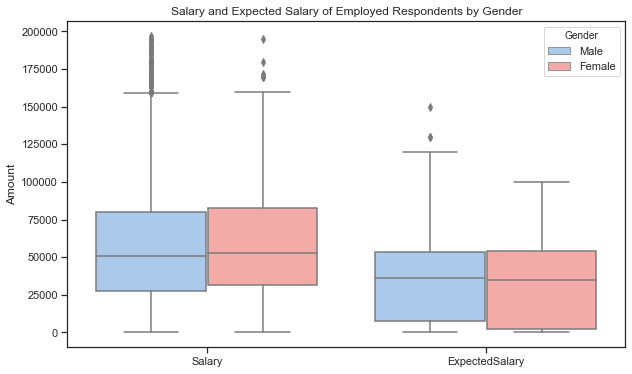

In [84]:
#Boxplot for Salary and Expected Salary 
plt.figure(figsize=(10,6))
sns.boxplot(x="Type", y="Amount",hue="Gender",palette=["b", "r"]
            ,data=salary_unpivot).set_title('Salary and Expected Salary of Employed Respondents by Gender');
plt.xlabel("")
plt.savefig("1.Salary_gender.png")

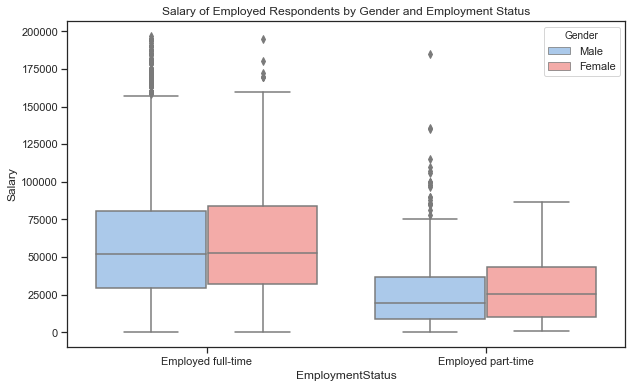

In [9]:
#Exclude missing values (only focus on the respondents with Salary)
#Boxplot for Salary by Gender and Employment Status
df_employed_salary =df_employed.dropna(subset=['Salary']) 
plt.figure(figsize=(10,6))
sns.boxplot(x="EmploymentStatus", y="Salary",hue="Gender",palette=["b", "r"]
        ,data=df_employed_salary).set_title('Salary of Employed Respondents by Gender and Employment Status');
plt.savefig("1.1.Salary employment_gender.png")

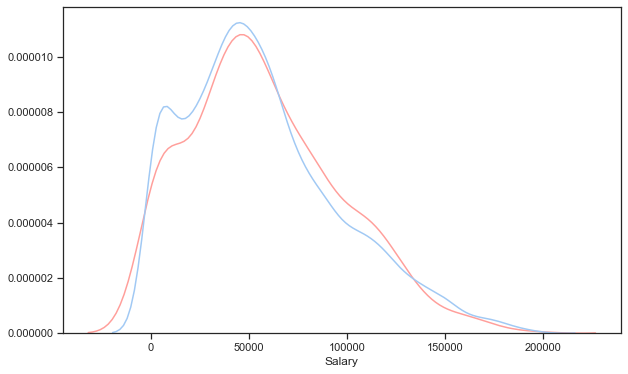

In [104]:
#distribution for Salary
plt.figure(figsize=(10,6))
sns.distplot(df_employed_salary.Salary[df_employed_salary.Gender=='Female'],hist=False,color="r")
sns.distplot(df_employed_salary.Salary[df_employed_salary.Gender=='Male'],hist=False,color="b");

#risht skewed (need a non-parametric test)

In [116]:
#check size of records
df_employed_salary.groupby(df_employed_salary.Gender).EmploymentStatus.value_counts()

Gender  EmploymentStatus  
Female  Employed full-time      788
        Employed part-time       31
Male    Employed full-time    10290
        Employed part-time      376
Name: EmploymentStatus, dtype: int64

In [10]:
#Mann-Whitney U Test: the null hypothesis is that female and male programmers have the same median of salary 
mannwhitneyu(df_employed_salary.Salary[df_employed_salary.Gender=='Female']
             ,df_employed_salary.Salary[df_employed_salary.Gender=='Male'])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=4253695.0, pvalue=0.1061843981185307)

In [202]:
#Mann-Whitney U Test: the null hypothesis is that full time female and male programmers
#have the same median of salary 
mannwhitneyu(df_employed_salary.Salary[(df_employed_salary.Gender=='Female')&
                                       (df_employed_salary.EmploymentStatus =='Employed full-time')]
             ,df_employed_salary.Salary[(df_employed_salary.Gender=='Male')&
                                      (df_employed_salary.EmploymentStatus =='Employed full-time')])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=3947951.5, pvalue=0.10959462175087858)

In [201]:
#Mann-Whitney U Test: the null hypothesis is that part time female and male programmers
#have the same median of salary 
mannwhitneyu(df_employed_salary.Salary[(df_employed_salary.Gender=='Female')&
                                       (df_employed_salary.EmploymentStatus =='Employed part-time')]
             ,df_employed_salary.Salary[(df_employed_salary.Gender=='Male')&
                                      (df_employed_salary.EmploymentStatus =='Employed part-time')])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=5320.5, pvalue=0.21029636764086723)

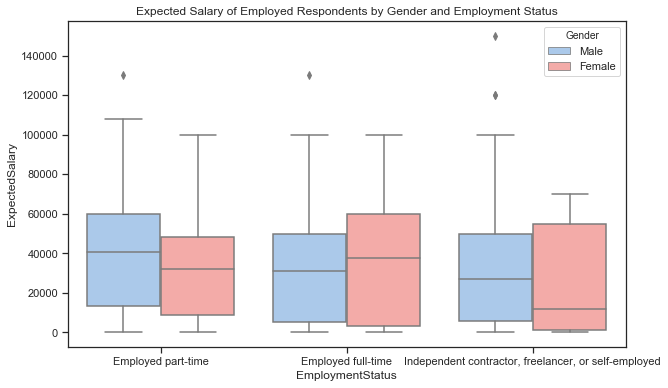

In [14]:
#Exclude missing values (only focus on the respondents with Expected Salary)
#Boxplot for Expected Salary by Gender and Employment Status
df_employed_exsalary =df_employed.dropna(subset=['ExpectedSalary']) 
plt.figure(figsize=(10,6))
sns.boxplot(x="EmploymentStatus", y="ExpectedSalary",hue="Gender",palette=["b", "r"]
 ,data=df_employed_exsalary).set_title('Expected Salary of Employed Respondents by Gender and Employment Status');
plt.savefig("1.2.Expected Salary employment_gender.png")

In [121]:
#check size of records
df_employed_exsalary.groupby(df_employed_exsalary.Gender).EmploymentStatus.value_counts()

Gender  EmploymentStatus                                    
Female  Employed full-time                                       37
        Employed part-time                                       37
        Independent contractor, freelancer, or self-employed     12
Male    Employed part-time                                      372
        Employed full-time                                      261
        Independent contractor, freelancer, or self-employed    192
Name: EmploymentStatus, dtype: int64

In [15]:
#Mann-Whitney U Test: the null hypothesis is that female and male programmers 
#have the same median of expected salary 
mannwhitneyu(df_employed_exsalary.ExpectedSalary[df_employed_exsalary.Gender=='Female']
           ,df_employed_exsalary.ExpectedSalary[df_employed_exsalary.Gender=='Male'])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=33410.0, pvalue=0.18695664747132118)

In [16]:
#Mann-Whitney U Test: the null hypothesis is that full time female and male programmers
#have the same median of expected salary 
mannwhitneyu(df_employed_exsalary.ExpectedSalary[(df_employed_exsalary.Gender=='Female')&
                                       (df_employed_exsalary.EmploymentStatus =='Employed full-time')]
             ,df_employed_exsalary.ExpectedSalary[(df_employed_exsalary.Gender=='Male')&
                                      (df_employed_exsalary.EmploymentStatus =='Employed full-time')])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=4754.0, pvalue=0.44003761948652514)

In [17]:
#Mann-Whitney U Test: the null hypothesis is that part time female and male programmers
#have the same median of expected salary 
mannwhitneyu(df_employed_exsalary.ExpectedSalary[(df_employed_exsalary.Gender=='Female')&
                                       (df_employed_exsalary.EmploymentStatus =='Employed part-time')]
             ,df_employed_exsalary.ExpectedSalary[(df_employed_exsalary.Gender=='Male')&
                                      (df_employed_exsalary.EmploymentStatus =='Employed part-time')])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=6003.0, pvalue=0.1000341887789441)

2. Can female programmerdevelopers get hired with a lower degree?

In [152]:
#check values in cloumn FormalEducation
df_employed.groupby(df_employed.Gender).FormalEducation.value_counts(normalize=True)

Gender  FormalEducation                                                  
Female  Bachelor's degree                                                    0.528124
        Master's degree                                                      0.279519
        Some college/university study without earning a bachelor's degree    0.099614
        Doctoral degree                                                      0.041219
        Secondary school                                                     0.033920
        Professional degree                                                  0.011593
        I prefer not to answer                                               0.004723
        I never completed any formal education                               0.000859
        Primary/elementary school                                            0.000429
Male    Bachelor's degree                                                    0.448364
        Master's degree                                           

In [153]:
#recategory FormalEducation: Master's degree and above/Bachelor's degree and Below
remap_edu_dict = {
    "Master's degree": "Master's degree and above",
    "Doctoral degree": "Master's degree and above",
    "Professional degree": "Master's degree and above",
    "Bachelor's degree": "Bachelor's degree and Below",
    "Some college/university study without earning a bachelor's degree": "Bachelor's degree and Below",
    "Secondary school": "Bachelor's degree and Below",
    "I never completed any formal education": "Bachelor's degree and Below",
    "Primary/elementary school ": "Bachelor's degree and Below"}

df_employed.FormalEducation = df_employed.FormalEducation.map(remap_edu_dict).astype('category')

In [154]:
df_employed.FormalEducation.value_counts(normalize=True)

Bachelor's degree and Below    0.712006
Master's degree and above      0.287994
Name: FormalEducation, dtype: float64

In [155]:
df_employed.Gender = df_employed.Gender.astype('category')
df_employed.Gender.cat.reorder_categories(['Male', 'Female'], inplace=True)

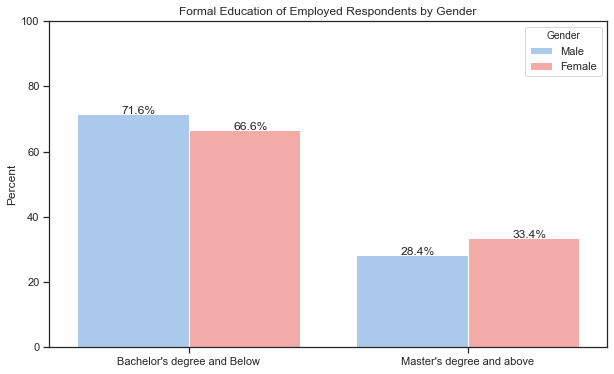

In [171]:
#Plotting percentage in Formal Education bar chart
plt.figure(figsize=(10,6))
edu_plot =(df_employed.FormalEducation.groupby(df_employed.Gender).value_counts(normalize=True)
        .mul(100).rename('Percent').reset_index()
        .pipe((sns.barplot, "data"), x='FormalEducation', y='Percent', hue='Gender',palette=["b", "r"]))
edu_plot.set_title('Formal Education of Employed Respondents by Gender')
edu_plot.set_ylim(0,100)
plt.xlabel("")
for p in edu_plot.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + p.get_width() / 2.5
    txt_y = p.get_height()
    edu_plot.text(txt_x,txt_y,txt)
plt.savefig("2.FormalEducation_gender.png")

In [160]:
# Contingency table for Chi-Square test
contingency = pd.crosstab(df_employed.Gender, df_employed.FormalEducation)
contingency

FormalEducation,Bachelor's degree and Below,Master's degree and above
Gender,,
Male,19919,7907
Female,1543,774


In [169]:
#The Chi-Square test of independence: the null hypothesis is that there is no relationship 
#between Formal Education and Gender.
c, p, dof, expected = chi2_contingency(contingency)

# interpret p-value
print('p=%.3f' % (p))
if p <=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')
    
#deny the null hypothesis(pvalue< 0.05)    

p=0.000
Reject H0


3. Do female programmers enjoy their job as a programmer?

In [189]:
#Statistics Summary for CareerSatisfaction and JobSatisfaction
df_employed.groupby(df.Gender)[['CareerSatisfaction','JobSatisfaction']].describe()

CareerSatisfaction                                                \
                    count      mean       std  min  25%  50%  75%   max   
Gender                                                                    
Female             2144.0  7.262593  1.852614  0.0  6.0  7.0  8.0  10.0   
Male              26585.0  7.442167  1.806625  0.0  7.0  8.0  9.0  10.0   

       JobSatisfaction                                                
                 count      mean       std  min  25%  50%  75%   max  
Gender                                                                
Female          2130.0  6.936620  2.182432  0.0  6.0  7.0  8.0  10.0  
Male           26305.0  7.004372  2.123671  0.0  6.0  7.0  8.0  10.0

In [170]:
#Exclude missing values (only focus on the respondents with CareerSatisfaction and JobSatisfaction)
satisfy = df_employed[['Gender','CareerSatisfaction','JobSatisfaction']]
satisfy_unpivot = satisfy.melt(id_vars=['Gender'], var_name='Type', value_name='Amount').dropna()
satisfy_unpivot.head()

,Gender,Type,Amount
1,Male,CareerSatisfaction,8.0
2,Male,CareerSatisfaction,6.0
3,Male,CareerSatisfaction,7.0
4,Male,CareerSatisfaction,7.0
5,Male,CareerSatisfaction,6.0


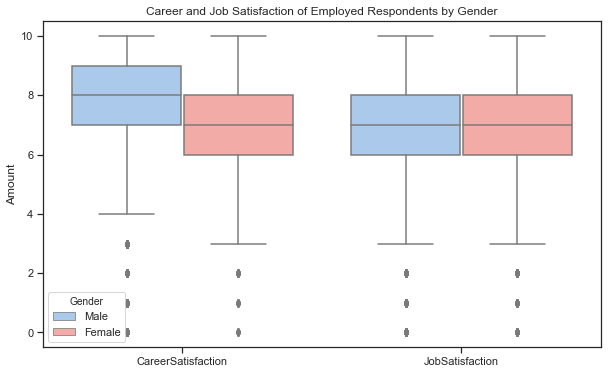

In [172]:
#Boxplot for CareerSatisfaction and JobSatisfaction
plt.figure(figsize=(10,6))
sns.boxplot(x="Type", y="Amount",hue="Gender",palette=["b", "r"]
            ,data=satisfy_unpivot).set_title('Career and Job Satisfaction of Employed Respondents by Gender');
plt.xlabel("")
plt.savefig("3.Satisfaction_gender.png")

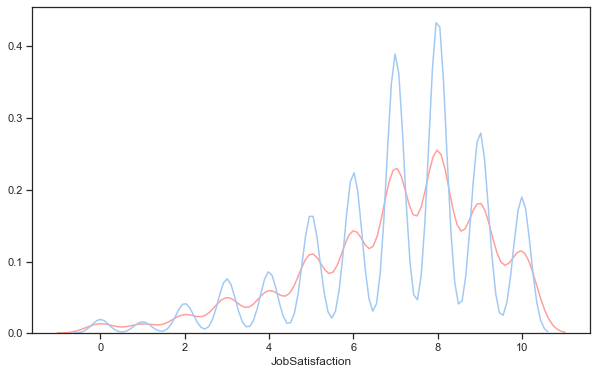

In [189]:
#distribution for JobSatisfaction
plt.figure(figsize=(10,6))
sns.distplot(df_employed.JobSatisfaction[df_employed.Gender=='Female'], hist=False,color="r")
sns.distplot(df_employed.JobSatisfaction[df_employed.Gender=='Male'], hist=False,color="b");

#Non-normal (need a non-parametric test)

In [190]:
#Mann-Whitney U Test: the null hypothesis is that female and male programmers have the same median of JobSatisfaction
mannwhitneyu(df_employed.JobSatisfaction[df_employed.Gender=='Female']
           ,df_employed.JobSatisfaction[df_employed.Gender=='Male'])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=32859652.0, pvalue=0.4460895467006929)

In [197]:
#Mann-Whitney U Test: the null hypothesis is that Career Satisfaction of female programmers tend to be higher
#than Career Satisfaction of male programmers
mannwhitneyu(df_employed.CareerSatisfaction[df_employed.Gender=='Female']
            ,df_employed.CareerSatisfaction[df_employed.Gender=='Male']
            ,alternative='less')

#deny the null hypothesis(pvalue <= 0.05)

MannwhitneyuResult(statistic=31959007.0, pvalue=0.008874148305926944)

4. Do female programmers enjoy coding as a hobby?

In [224]:
#check values in cloumn ProgramHobby
df_employed.groupby(df_employed.Gender).ProgramHobby.value_counts(normalize=True)

Gender  ProgramHobby                             
Male    Yes, I program as a hobby                    0.475323
        Yes, both                                    0.289439
        No                                           0.175694
        Yes, I contribute to open source projects    0.059544
Female  Yes, I program as a hobby                    0.423358
        No                                           0.356805
        Yes, both                                    0.162301
        Yes, I contribute to open source projects    0.057535
Name: ProgramHobby, dtype: float64

In [226]:
#reorder category for plots 
df_employed.loc[:,('ProgramHobby')] = df_employed['ProgramHobby'].astype('category')

In [230]:
df_employed['ProgramHobby'].cat.reorder_categories(['Yes, I program as a hobby',
                                            'Yes, I contribute to open source projects',
                                            'Yes, both','No'],ordered=True,inplace=True)

In [213]:
#prepare dataset for bar chart
#hobby = df_employed.ProgramHobby.groupby(df_employed.Gender)\
#        .value_counts(normalize=True).rename('proportion').reset_index()
#hobby.sort_values(['Gender','ProgramHobby'], ascending=False, inplace =True)

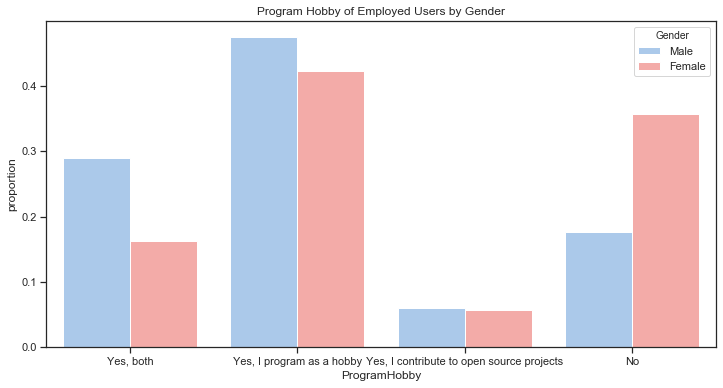

In [55]:
#Bar chart for Program Hobby
#plt.figure(figsize=(12,6))
#sns.barplot(x='ProgramHobby', y='proportion', hue='Gender',palette=["b", "r"]
#            ,data =hobby).set_title('Program Hobby of Employed Respondents by Gender');

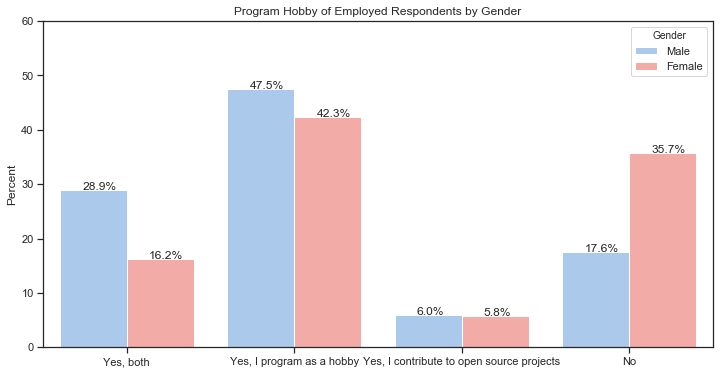

In [234]:
#Plotting percentage in bar chart
plt.figure(figsize=(12,6))
hobby_plot =(df_employed.ProgramHobby.groupby(df_employed.Gender).value_counts(normalize=True).mul(100)
    .rename('Percent').reset_index().sort_values(['Gender','ProgramHobby'], ascending=False)
    .pipe((sns.barplot, "data"), x='ProgramHobby', y='Percent', hue='Gender',palette=["b", "r"]))
hobby_plot.set_title('Program Hobby of Employed Respondents by Gender')
hobby_plot.set_ylim(0,60)
plt.xlabel("")
for p in hobby_plot.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height()
    hobby_plot.text(txt_x,txt_y,txt)
plt.savefig("4.ProgramHobby_gender.png")

In [235]:
 # Contingency table for Chi-Square test
contingency_hobby = pd.crosstab(df_employed.Gender, df_employed.ProgramHobby)
contingency_hobby

ProgramHobby,"Yes, I program as a hobby","Yes, I contribute to open source projects","Yes, both",No
Gender,,,,
Male,13435,1683,8181,4966
Female,986,134,378,831


In [236]:
#The Chi-Square test of independence: the null hypothesis is that there is no relationship 
#between Program Hobby and Gender.
c2, p2, dof2, expected2 = chi2_contingency(contingency_hobby)

# interpret p-value
print('p=%.3f' % (p2))
if p2 <=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')
    
#deny the null hypothesis(pvalue< 0.05)    

p=0.000
Reject H0


In [ ]:
###other

In [217]:
df_employed.groupby(df_employed.Gender).CompanySize.value_counts(normalize=True)

Gender  CompanySize             
Male    20 to 99 employees          0.221507
        100 to 499 employees        0.194145
        10,000 or more employees    0.147115
        10 to 19 employees          0.101999
        1,000 to 4,999 employees    0.101592
        Fewer than 10 employees     0.096584
        500 to 999 employees        0.063765
        5,000 to 9,999 employees    0.042673
        I don't know                0.018568
        I prefer not to answer      0.012053
Female  20 to 99 employees          0.226977
        100 to 499 employees        0.185581
        10,000 or more employees    0.148372
        1,000 to 4,999 employees    0.107907
        10 to 19 employees          0.092558
        Fewer than 10 employees     0.077209
        500 to 999 employees        0.074419
        5,000 to 9,999 employees    0.041395
        I don't know                0.032093
        I prefer not to answer      0.013488
Name: CompanySize, dtype: float64

In [218]:
df_employed.groupby(df_employed.Gender).Professional.value_counts(normalize=True)

Gender  Professional                                        
Male    Professional developer                                  0.824447
        Professional non-developer who sometimes writes code    0.095135
        Student                                                 0.055900
        Used to be a professional developer                     0.016027
        None of these                                           0.008491
Female  Professional developer                                  0.772005
        Professional non-developer who sometimes writes code    0.133963
        Student                                                 0.075998
        Used to be a professional developer                     0.012022
        None of these                                           0.006011
Name: Professional, dtype: float64

In [220]:
df_employed.groupby(df_employed.Gender).WorkStart.value_counts(normalize=True)

Gender  WorkStart
Male    9:00 AM      0.255212
        10:00 AM     0.248456
        8:00 AM      0.199212
        7:00 AM      0.095993
        11:00 AM     0.060696
        6:00 AM      0.034394
        Noon         0.029120
        2:00 PM      0.011128
        1:00 PM      0.009935
        5:00 AM      0.007623
        8:00 PM      0.006973
        6:00 PM      0.006178
        4:00 PM      0.005889
        10:00 PM     0.005203
        3:00 PM      0.005130
        9:00 PM      0.003757
        4:00 AM      0.002999
        5:00 PM      0.002818
        7:00 PM      0.002818
        11:00 PM     0.001843
        Midnight     0.001770
        3:00 AM      0.001228
        1:00 AM      0.000939
        2:00 AM      0.000686
Female  10:00 AM     0.275077
        9:00 AM      0.258870
        8:00 AM      0.191415
        7:00 AM      0.099869
        11:00 AM     0.062637
        6:00 AM      0.024967
        Noon         0.024091
        1:00 PM      0.010512
        2:00 PM      0